# CS541: Applied Machine Learning, Spring 2025, Lab 2

## Brief intro to SVMs in Scikit Learn

Lab 2 is an exercise that introduces the [Scikit Learn](https://scikit-learn.org/stable/install.html) Python library. When working with datasets, Scikit Learn provides commonly used machine learning models that you can use to train and test some of these common models. It also provides a selection of efficient tools for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction via a consistence interface in Python.

The goal of this is to gain a basic understanding of how the SVM model works in Scikit Learn and some of the functions available in in Scikit Learn library like splitting into data splits.

*Lab Grading**

Labs are hands-on exercises designed to provide guided experience in key concepts through this class.  You are graded based on in-lab participation (not correctness), and are not required to submit your lab if you attend in-person.  *Make sure you fill out the attendence form before leaving class*.

For students who miss a lab, you can submit a make-up lab on gradescope by the Friday directly following the lab for partial credit.  Please see the syllabus for the lab grading policy.

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
from scipy import stats

/var/folders/64/dkndw9l10ls5pdzpx8fmcqpc0000gn/T/ipykernel_13232/483161010.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


## Motivation
   First we want to load a set of datapoints using sklearn to explore using the SVM model available through sklearn
  

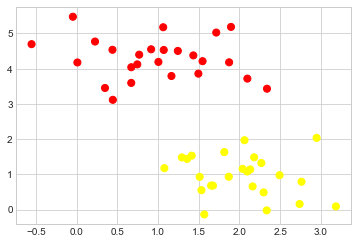

In [3]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

In [4]:
print(X.shape)
print(y.shape)

(50, 2)
(50,)


In [5]:
print(X[:2])
print(y[:2])
print(np.unique(y))

[[1.41281595 1.5303347 ]
 [1.81336135 1.6311307 ]]
[1 1]
[0 1]


###Linear discrimination
   We want to create a simple decison boundary to sepearate the two classes, this is manually created

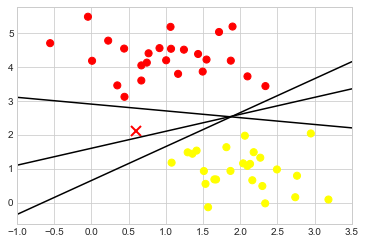

In [6]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

### SVM
Here we go about loading the SVM classifier and fitting it to our data

In [7]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In [8]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot decision boundary and margins

    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors

    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, edgecolors='black',
                   facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)

    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

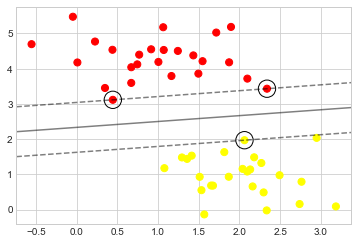

In [9]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

### Problem 1
This problem is a bit more difficult because we cannot use a simple linear decision boundary since the data requires a circular boundary

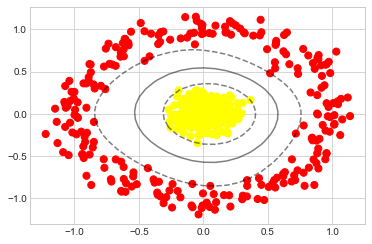

In [12]:
from sklearn.datasets import make_circles
X, y = make_circles(500, factor=.1, noise=.1)


##Create a model called clf, fit it and then pass it to the decision function

##Code start
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

##Code end

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

In [13]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

In [14]:
print(X.shape)

(500, 2)


### How can you do better?
Firstly we want to ensure that our model is fitting to our data correctly so we want to train and test on our train and validation sets, and once we are comfortable with our results we can do predictions on the test set

In [16]:
# Split dataset into training set, validation set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=109) # 70% training and 30% test
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=(0.1/(0.8+0.1)),random_state=109) # 70% training and 30% test

In [18]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(355, 2)
(45, 2)
(100, 2)


In [19]:
from sklearn.svm import SVC # "Support vector classifier"
#Write code to declare the SVC classifier using a kernel that is suited for a circular bondary
clf = SVC(kernel='rbf', C=1E6)

In [20]:
import sklearn.metrics as metrics
#Write code to fit the SVC classifier clf to the training set
#clf.
clf.fit(X_train, y_train)

#Write code to use the SVC classifier clf to predict the output for the training set X_train
y_pred = clf.predict(X_train)

#Write code to determine the accuracy for the y_train utilizing the y_pred
#It might be useful to use the sklearn metrics module
# Model Accuracy: how often is the classifier correct for the train set?
train_acc = metrics.accuracy_score(y_train, y_pred)
print("Train set accuracy:",train_acc)


#Write code to use the SVC classifier clf to predict the output for the validation set X_val
y_pred = clf.predict(X_val)

#Write code to determine the accuracy for the y_val utilizing the y_pred
#It might be useful to use the sklearn metrics module
# Model Accuracy: how often is the classifier correct for the validation set?
val_acc = metrics.accuracy_score(y_val, y_pred)

# Model Accuracy: how often is the classifier correct?
print("Validation set accuracy:",val_acc)

Train set accuracy: 1.0
Validation set accuracy: 1.0


In [21]:
#Write code to use the SVC classifier clf to predict the output for the training set X_test
y_pred = clf.predict(X_test)

#Write code to determine the accuracy for the y_test utilizing the y_pred
#It might be useful to use the sklearn metrics moedule
# Model Accuracy: how often is the classifier correct for test set?
test_acc = metrics.accuracy_score(y_test, y_pred)

# Model Accuracy: how often is the classifier correct?
print("Test set accuracy:",test_acc)

Test set accuracy: 1.0


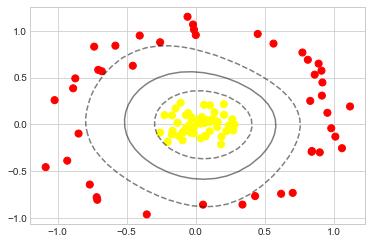

In [22]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

### Cross-Validation
Here we want to verify that our model performs well under different splits of the dataset and then average these scores

In [23]:
from sklearn.model_selection import cross_val_score


#Write code to declare the SVC classifier using a kernel that is suited for a circular bondary (as done previously)
clf = SVC(kernel='rbf', C=1E6)

#Write code to implement the cross validation function from sklearn utilizing the SVC, clf you just defined, for the cross validation utilize a cv=5
# and using the X and y returned from the make_circles at the start of the problem 1

scores = cross_val_score(clf, X, y, cv=5)
print(scores)

[1. 1. 1. 1. 1.]


In [24]:
#Just a sanity check to make sure our y has two classes
print(np.unique(y))

[0 1]


In [25]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

1.00 accuracy with a standard deviation of 0.00


### Problem 2
Now in the real world data can overlap at times and in these instance we want to change parameters so we can improve our performance, however this does not always work out well and can reduce performance

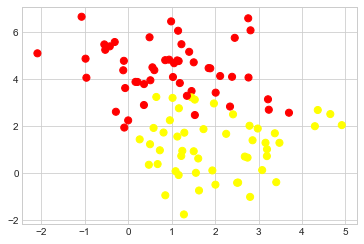

In [26]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

In [28]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=109) # 70% training and 30% test
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=(0.1/(0.8+0.1)),random_state=109) # 70% training and 30% test

In [29]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(71, 2)
(9, 2)
(20, 2)


In [30]:
#Write code to declare the SVC classifier using a kernel that is suited for a circular bondary
clf = SVC(kernel='rbf', C=1E6)

#Write code to fit the SVC classifier clf to the training set
#clf.
clf.fit(X_train, y_train)

SVC(C=1000000.0)

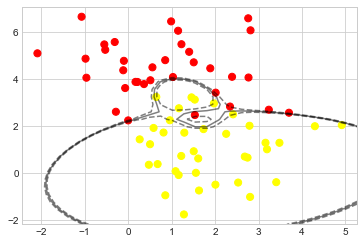

In [31]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

In [32]:
#Write code to use the SVC classifier clf to predict the output for the training set X_train
y_pred = clf.predict(X_train)

#Write code to determine the accuracy for the y_train utilizing the y_pred
#It might be useful to use the sklearn metrics module
# Model Accuracy: how often is the classifier correct for the train set?
train_acc = metrics.accuracy_score(y_train, y_pred)
print("Train set accuracy:",train_acc)


Train set accuracy: 1.0


In [33]:
#Write code to use the SVC classifier clf to predict the output for the validation set X_val
#y_pred =

#Write code to determine the accuracy for the y_val utilizing the y_pred
#It might be useful to use the sklearn metrics module
# Model Accuracy: how often is the classifier correct for the validation set?
#val_acc =

# Model Accuracy: how often is the classifier correct?
print("Validation set accuracy:",val_acc)


Validation set accuracy: 1.0


In [34]:
#Write code to use the SVC classifier clf to predict the output for the training set X_test
y_pred = clf.predict(X_test)

#Write code to determine the accuracy for the y_test utilizing the y_pred
#It might be useful to use the sklearn metrics moedule
# Model Accuracy: how often is the classifier correct for test set?
test_acc = metrics.accuracy_score(y_test, y_pred)

# Model Accuracy: how often is the classifier correct?
print("Test set accuracy:",test_acc)

Test set accuracy: 0.85


Now if we try and change the regularization term C, for the SVM and we have it too high we can improve the train performance, but it can decrease the validation set performance, this can indicate that we are overfitting our model

In [36]:
#Write code to declare the SVC classifier using a kernel that is suited for a circular bondary
#utilize a regularization term C=20
#clf =

#Write code to fit the SVC classifier clf to the training set
#clf.

from sklearn.svm import SVC # "Support vector classifier"
clf = SVC(kernel='rbf', C=20)
clf.fit(X_train, y_train)

#Write code to use the SVC classifier clf to predict the output for the training set X_train
y_pred = clf.predict(X_train)

#Write code to determine the accuracy for the y_train utilizing the y_pred
#It might be useful to use the sklearn metrics module
# Model Accuracy: how often is the classifier correct for the train set?
train_acc = metrics.accuracy_score(y_train, y_pred)
print("Train set accuracy:",train_acc)


Train set accuracy: 0.971830985915493


In [37]:
#Write code to use the SVC classifier clf to predict the output for the validation set X_val
y_pred = clf.predict(X_val)

#Write code to determine the accuracy for the y_val utilizing the y_pred
#It might be useful to use the sklearn metrics module
# Model Accuracy: how often is the classifier correct for the validation set?
val_acc = metrics.accuracy_score(y_val, y_pred)

# Model Accuracy: how often is the classifier correct?
print("Validation set accuracy:",val_acc)

Validation set accuracy: 0.6666666666666666


In [38]:
#Write code to declare the SVC classifier using a kernel that is suited for a circular bondary (as done previously),we won't declare
#a regularization term C (it will default to 1 which is fine)
clf = SVC(kernel='rbf')

#Write code to implement the cross validation function from sklearn utilizing the SVC, clf you just defined, for the cross validation utilize a cv=5
# and using the X and y returned from the make_circles at the start of the problem
scores = cross_val_score(clf, X, y, cv=5)
print(scores)


[0.8 0.9 0.8 0.8 1. ]


### Your Solution

### Problem 3
Here we want to use an SVM on a real world problem of classifying faces

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


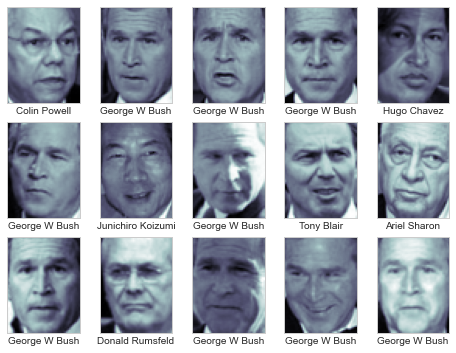

In [39]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

fig, ax = plt.subplots(3, 5, figsize=(8, 6))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target,test_size=0.2,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(Xtrain, ytrain, test_size=(0.1/(0.8+0.1)),random_state=42)

In [49]:
print(X_train.shape, X_val.shape, X_test.shape, y_train.shape, X_val.shape, y_test.shape)

(958, 2914) (120, 2914) (270, 2914) (958,) (120, 2914) (270,)


In [50]:
#Write code to declare the SVC classifier using a kernel that is suited for a circular bondary
clf = SVC(kernel='rbf', C=1E6)
#Write code to fit the SVC classifier clf to the training set
#clf.
clf.fit(Xtrain, ytrain)

SVC(C=1000000.0)

In [51]:
#Write code to use the SVC classifier clf to predict the output for the training set X_train
y_pred = clf.predict(X_train)

#Write code to determine the accuracy for the y_train utilizing the y_pred
#It might be useful to use the sklearn metrics module
# Model Accuracy: how often is the classifier correct for the train set?
train_acc = metrics.accuracy_score(y_train, y_pred)
print("Training accuracy:",train_acc)



#Write code to use the SVC classifier clf to predict the output for the validation set X_val
y_pred = clf.predict(X_val)

#Write code to determine the accuracy for the y_val utilizing the y_pred
#It might be useful to use the sklearn metrics module
# Model Accuracy: how often is the classifier correct for the validation set?
val_acc = metrics.accuracy_score(y_val, y_pred)

# Model Accuracy: how often is the classifier correct?
print("Validation set accuracy:",val_acc)

#Write code to use the SVC classifier clf to predict the output for the training set X_test
y_pred = clf.predict(X_test)

#Write code to determine the accuracy for the y_test utilizing the y_pred
#It might be useful to use the sklearn metrics moedule
# Model Accuracy: how often is the classifier correct for test set?
test_acc = metrics.accuracy_score(y_test, y_pred)

# Model Accuracy: how often is the classifier correct?
print("Test set accuracy:",test_acc)

Training accuracy: 1.0
Validation set accuracy: 1.0
Test set accuracy: 0.8296296296296296


In [52]:
#Write code to declare the SVC classifier using a kernel that is suited for a circular bondary (as done previously)
clf = SVC(kernel='rbf', C=1E6)

#Write code to implement the cross validation function from sklearn utilizing the SVC, clf you just defined, for the cross validation utilize a cv=5
# and using the faces.data and faces.target
scores = cross_val_score(clf, faces.data, faces.target, cv=5)
print(scores)


[0.86296296 0.8        0.83333333 0.83643123 0.82899628]


### Your Solution

Usefel
https://scikit-learn.org/stable/modules/cross_validation.html